# Análisis Exploratorio de Datos (EDA) - Proyecto FIFA Scouting

**EDA:** enfoque inicial para analizar un conjunto de datos que utiliza estadísticas y visualizaciones para comprenderlo mejor, encontrar patrones y detectar anomalías antes de un análisis más formal.

## Información del Proyecto

### **TEMA DEL PROYECTO**

Sistema de Scouting y Valoración de Jugadores de Fútbol Profesional

### **OBJETIVO**

Construir una herramienta que permita:

1. Filtrar y analizar jugadores (edad, posición, nacionalidad, potencial, etc.)
2. Predecir su valor de mercado estimado usando un modelo de Machine Learning (regresión)
3. Identificar jugadores infravalorados, cuyo valor real sea menor al estimado por el modelo

**Dataset:** FIFA 15-21 con 120,679 jugadores y 71 atributos después de la limpieza.

## **Librerías**

In [1]:
# verificar qué python está usando el notebook
import sys
print(f"Python ejecutable: {sys.executable}")
print(f"Versión: {sys.version}")

Python ejecutable: c:\proyectos\seminario-complexivo-grupo-7\venv\Scripts\python.exe
Versión: 3.14.0 (tags/v3.14.0:ebf955d, Oct  7 2025, 10:15:03) [MSC v.1944 64 bit (AMD64)]


In [2]:
# pandas para manejar dataframes (tablas)
import pandas as pd
# matplotlib para gráficos básicos
import matplotlib.pyplot as plt
# seaborn para gráficos estadísticos más avanzados
import seaborn as sns
# plotly para gráficos interactivos
import plotly.express as px
import plotly.io as pio
# numpy para operaciones numéricas
import numpy as np

# configuración del renderizador para entornos de notebook
pio.renderers.default = "notebook"

## **Cargar Datos**

In [3]:
# ruta al archivo limpio generado por el pipeline
ruta = r"../data/processed/fifa_limpio.csv"

In [4]:
# leer el archivo csv
fifa = pd.read_csv(ruta)

In [5]:
# información general del dataframe
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120679 entries, 0 to 120678
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   nombre_corto                 120679 non-null  object 
 1   nombre_completo              120679 non-null  object 
 2   edad                         120679 non-null  int64  
 3   fecha_nacimiento             120679 non-null  object 
 4   altura_cm                    120679 non-null  int64  
 5   peso_kg                      120679 non-null  int64  
 6   nacionalidad                 120679 non-null  object 
 7   club                         120679 non-null  object 
 8   liga                         120679 non-null  object 
 9   ranking_liga                 120671 non-null  float64
 10  calificacion_general         120679 non-null  int64  
 11  potencial                    120679 non-null  int64  
 12  valor_euros                  120679 non-null  int64  
 13 

In [6]:
# primeros 5 registros para ver la estructura
fifa.head()

nombre_corto                      nombre_completo  edad  \
0  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro    32   
1           L. Messi       Lionel Andrés Messi Cuccittini    28   
2           L. Messi       Lionel Andrés Messi Cuccittini    32   
3  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro    31   
4  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro    33   

  fecha_nacimiento  altura_cm  peso_kg nacionalidad          club  \
0       1985-02-05        185       80     Portugal   Real Madrid   
1       1987-06-24        170       72    Argentina  FC Barcelona   
2       1987-06-24        170       72    Argentina  FC Barcelona   
3       1985-02-05        185       80     Portugal   Real Madrid   
4       1985-02-05        187       83     Portugal      Juventus   

                     liga  ranking_liga  ...  porteria_saque  \
0  Spain Primera Division           1.0  ...              15   
1  Spain Primera Division           1.0  ...              15   
2  Spain Primera Division           1.0  ...              15   
3  Spain Primera Division           1.0  ...              15   
4         Italian Serie A           1.0  ...              15   

   porteria_posicionamiento  porteria_reflejos  anio  categoria_edad  \
0                        14                 11  2018        Veterano   
1                        14                  8  2016     Consolidado   
2                        14                  8  2020        Veterano   
3                        14                 11  2017        Veterano   
4                        14                 11  2019        Veterano   

  categoria_valor margen_crecimiento  posicion_principal        imc  \
0           Elite                  0                  LW  23.374726   
1           Elite                  1                  RW  24.913495   
2           Elite                  0                  RW  24.913495   
3           Elite                  0                  LW  23.374726   
4           Elite                  0                  ST  23.735308   

   promedio_atributos  
0           78.000000  
1           74.500000  
2           78.666667  
3           78.166667  
4           77.833333  

[5 rows x 71 columns]

In [7]:
# forma del dataframe (filas, columnas)
print(f"Total de jugadores: {fifa.shape[0]}")
print(f"Total de columnas: {fifa.shape[1]}")

Total de jugadores: 120679
Total de columnas: 71


## **Análisis Estadístico**

In [8]:
# resumen estadístico de variables numéricas
fifa.describe()

edad      altura_cm        peso_kg   ranking_liga  \
count  120679.000000  120679.000000  120679.000000  120671.000000   
mean       25.042269     181.191566      75.282966       1.376031   
std         4.606667       6.712861       6.987112       0.748298   
min        16.000000     154.000000      49.000000       0.000000   
25%        21.000000     176.000000      70.000000       1.000000   
50%        25.000000     181.000000      75.000000       1.000000   
75%        28.000000     186.000000      80.000000       2.000000   
max        47.000000     208.000000     110.000000       4.000000   

       calificacion_general      potencial   valor_euros  salario_euros  \
count         120679.000000  120679.000000  1.206790e+05  120679.000000   
mean              65.681361      70.698937  2.081105e+06   11410.028671   
std                7.100858       6.301906  4.921342e+06   22633.049107   
min               40.000000      43.000000  1.000000e+03       0.000000   
25%               61.000000      66.000000  2.750000e+05    2000.000000   
50%               66.000000      70.000000  6.250000e+05    4000.000000   
75%               70.000000      75.000000  1.600000e+06   10000.000000   
max               94.000000      95.000000  1.230000e+08  575000.000000   

       clausula_rescision_euros  reputacion_internacional  ...  \
count              1.206790e+05             120679.000000  ...   
mean               3.072732e+06                  1.112232  ...   
std                8.193929e+06                  0.389647  ...   
min                9.000000e+03                  1.000000  ...   
25%                9.790000e+05                  1.000000  ...   
50%                1.200000e+06                  1.000000  ...   
75%                1.400000e+06                  1.000000  ...   
max                2.368000e+08                  5.000000  ...   

       defensa_entrada_deslizante  porteria_estiradas  porteria_manejo  \
count               120679.000000       120679.000000    120679.000000   
mean                    45.560064           16.533606        16.278657   
std                     20.984919           17.663460        16.792143   
min                      3.000000            1.000000         1.000000   
25%                     25.000000            8.000000         8.000000   
50%                     51.000000           11.000000        11.000000   
75%                     64.000000           14.000000        14.000000   
max                     95.000000           91.000000        92.000000   

       porteria_saque  porteria_posicionamiento  porteria_reflejos  \
count   120679.000000             120679.000000      120679.000000   
mean        16.135019                 16.276817          16.654347   
std         16.400065                 16.940893          17.967167   
min          1.000000                  1.000000           1.000000   
25%          8.000000                  8.000000           8.000000   
50%         11.000000                 11.000000          11.000000   
75%         14.000000                 14.000000          14.000000   
max         95.000000                 91.000000          94.000000   

                anio  margen_crecimiento            imc  promedio_atributos  
count  120679.000000       120679.000000  120679.000000       120679.000000  
mean     2018.122797            5.017576      22.904604           59.026486  
std         1.989014            5.179302       1.365367            6.366816  
min      2015.000000            0.000000      16.820454           34.333333  
25%      2016.000000            0.000000      22.024323           55.166667  
50%      2018.000000            4.000000      22.893074           58.333333  
75%      2020.000000            8.000000      23.765432           63.166667  
max      2021.000000           28.000000      34.717839           81.500000  

[8 rows x 57 columns]

In [9]:
# ver las columnas disponibles
fifa.columns

Index(['nombre_corto', 'nombre_completo', 'edad', 'fecha_nacimiento',
       'altura_cm', 'peso_kg', 'nacionalidad', 'club', 'liga', 'ranking_liga',
       'calificacion_general', 'potencial', 'valor_euros', 'salario_euros',
       'clausula_rescision_euros', 'posiciones', 'pie_preferido',
       'reputacion_internacional', 'pie_debil', 'habilidades_movimiento',
       'ritmo_trabajo', 'tipo_cuerpo', 'fecha_ingreso_club', 'contrato_hasta',
       'velocidad', 'tiro', 'pase', 'regate', 'defensa', 'fisico',
       'ataque_centros', 'ataque_definicion', 'ataque_precision_cabeza',
       'ataque_pase_corto', 'ataque_voleas', 'habilidad_regate',
       'habilidad_efecto', 'habilidad_tiros_libres', 'habilidad_pase_largo',
       'habilidad_control_balon', 'movimiento_aceleracion',
       'movimiento_velocidad_sprint', 'movimiento_agilidad',
       'movimiento_reacciones', 'movimiento_equilibrio', 'potencia_tiro',
       'potencia_salto', 'potencia_resistencia', 'potencia_fuerza',
       'pot

In [10]:
# verificar si hay valores nulos (no deberían haber después del pipeline)
fifa.isnull().sum()

nombre_corto          0
nombre_completo       0
edad                  0
fecha_nacimiento      0
altura_cm             0
                     ..
categoria_valor       0
margen_crecimiento    0
posicion_principal    0
imc                   0
promedio_atributos    0
Length: 71, dtype: int64

## **Visualizaciones con Pandas**

Pandas tiene métodos de visualización básicos incorporados. Son rápidos para un primer vistazo.

### **Gráfico de líneas - Jugadores por Año**

In [11]:
# contar jugadores por año
jugadores_por_anio = fifa.groupby("anio")["nombre_corto"].count()
jugadores_por_anio

anio
2015    15793
2016    15351
2017    17240
2018    17657
2019    17795
2020    18184
2021    18659
Name: nombre_corto, dtype: int64

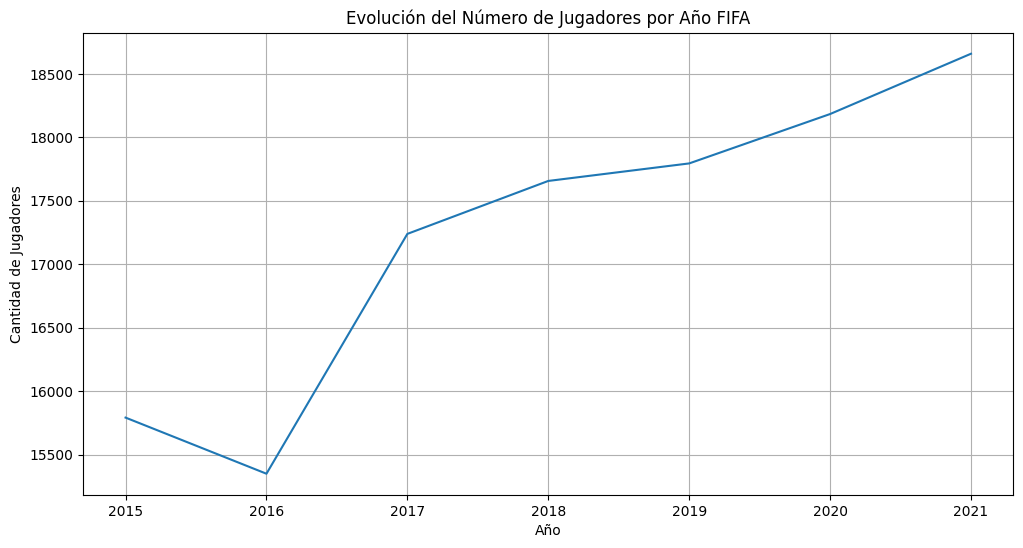

In [12]:
# gráfico de líneas simple con pandas
jugadores_por_anio.plot(
    kind='line',
    figsize=(12, 6), # tamaño de la figura
    title='Evolución del Número de Jugadores por Año FIFA',
    xlabel='Año',
    ylabel='Cantidad de Jugadores'
)
plt.grid(True) # añadir una cuadrícula
plt.show() # mostrar el gráfico

### **Gráfico de barras - Jugadores por Posición**

In [13]:
# contar jugadores por posición principal
jugadores_por_posicion = fifa["posicion_principal"].value_counts()
jugadores_por_posicion

posicion_principal
CB     20324
ST     17647
CM     14284
GK     13371
CDM     9395
RB      9027
LB      8991
CAM     7469
LM      7019
RM      6942
RW      2502
LW      2355
CF       716
LWB      332
RWB      305
Name: count, dtype: int64

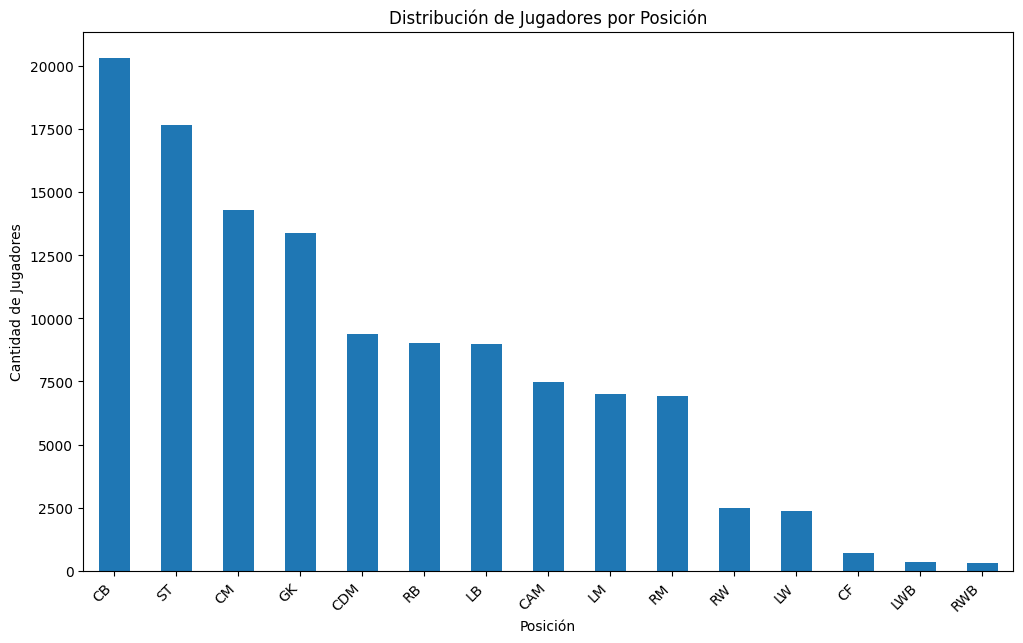

In [14]:
# gráfico de barras
jugadores_por_posicion.plot(
    kind='bar',
    figsize=(12, 7),
    title='Distribución de Jugadores por Posición',
    xlabel='Posición',
    ylabel='Cantidad de Jugadores'
)
plt.xticks(rotation=45, ha='right') # rotar etiquetas para legibilidad
plt.show()

### **Histograma - Distribución de Edad**

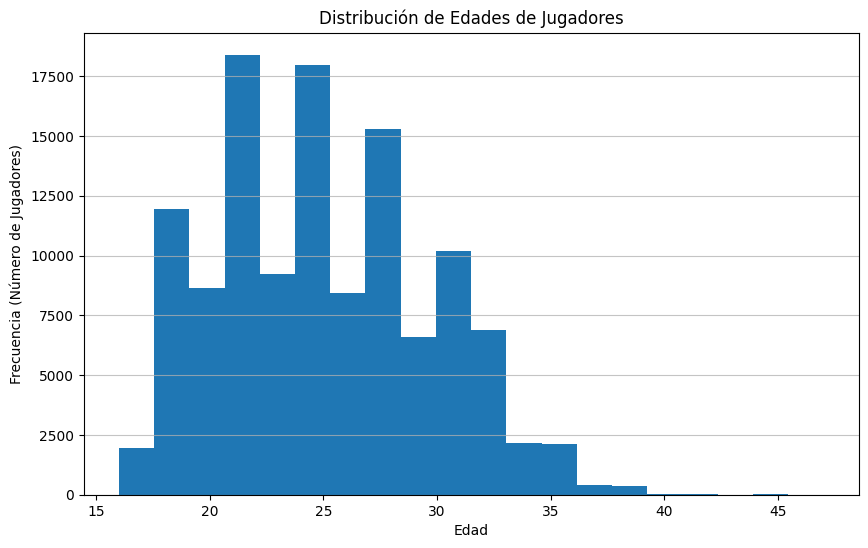

In [15]:
# histograma de edad de jugadores
fifa['edad'].plot(
    kind='hist',
    bins=20, # número de "barras" en el histograma
    figsize=(10, 6),
    title='Distribución de Edades de Jugadores',
    xlabel='Edad'
)
plt.ylabel('Frecuencia (Número de Jugadores)')
plt.grid(axis='y', alpha=0.75) # añadir rejilla horizontal
plt.show()

### **Histograma - Distribución de Calificación General**

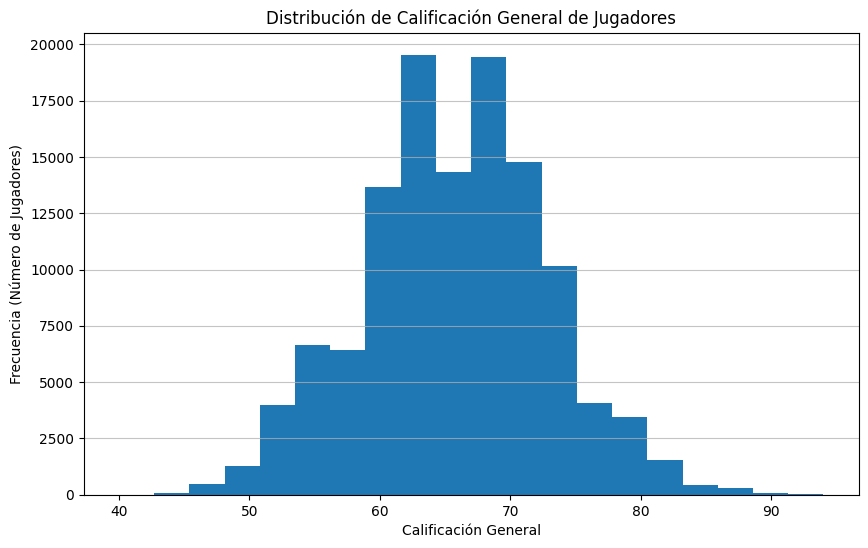

In [16]:
# histograma de calificación general
fifa['calificacion_general'].plot(
    kind='hist',
    bins=20,
    figsize=(10, 6),
    title='Distribución de Calificación General de Jugadores',
    xlabel='Calificación General'
)
plt.ylabel('Frecuencia (Número de Jugadores)')
plt.grid(axis='y', alpha=0.75)
plt.show()

### **Histograma - Distribución de Valor de Mercado (TARGET)**

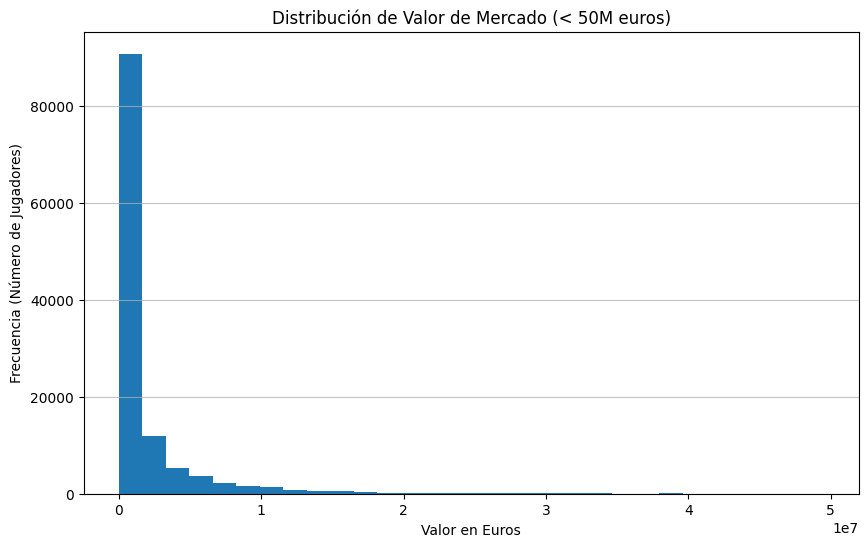

In [17]:
# histograma de valor en euros (variable objetivo)
# usamos filtro para ver mejor la distribución (sin valores extremos)
fifa_filtrado = fifa[fifa['valor_euros'] < 50000000].copy()

fifa_filtrado['valor_euros'].plot(
    kind='hist',
    bins=30,
    figsize=(10, 6),
    title='Distribución de Valor de Mercado (< 50M euros)',
    xlabel='Valor en Euros'
)
plt.ylabel('Frecuencia (Número de Jugadores)')
plt.grid(axis='y', alpha=0.75)
plt.show()

### **Gráfico de dispersión - Calificación vs Valor**

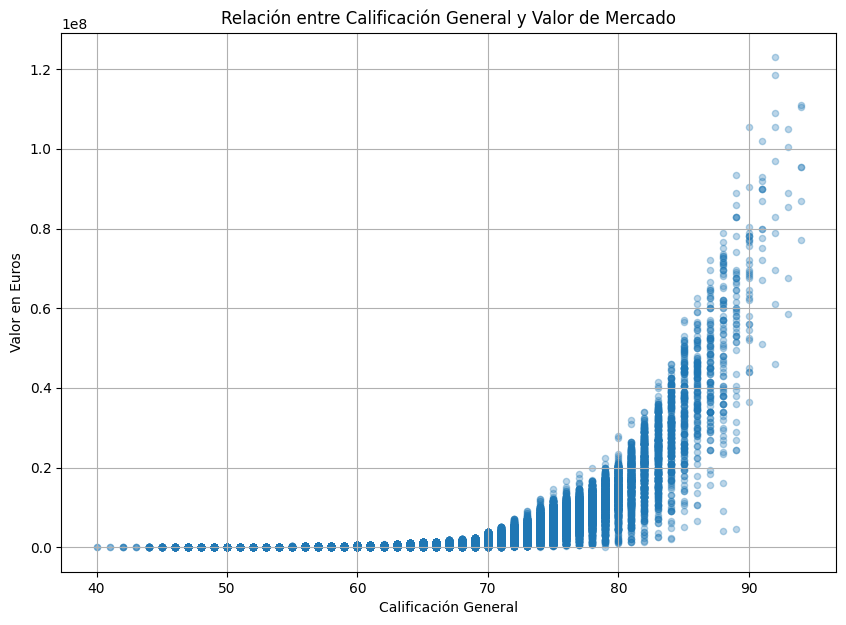

In [18]:
# relación entre calificación general y valor de mercado
fifa.plot(
    kind='scatter',
    x='calificacion_general', # variable en el eje X
    y='valor_euros',          # variable en el eje Y (TARGET)
    alpha=0.3,                # transparencia para ver puntos superpuestos
    figsize=(10, 7),
    title='Relación entre Calificación General y Valor de Mercado'
)
plt.xlabel('Calificación General')
plt.ylabel('Valor en Euros')
plt.grid(True)
plt.show()

### **Gráfico de dispersión - Edad vs Valor**

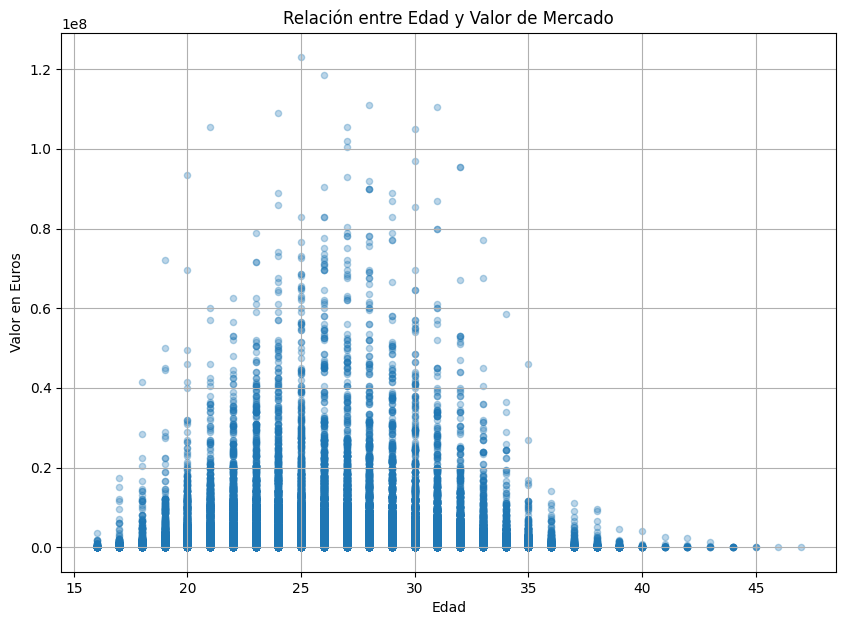

In [19]:
# relación entre edad y valor de mercado
fifa.plot(
    kind='scatter',
    x='edad',
    y='valor_euros',
    alpha=0.3,
    figsize=(10, 7),
    title='Relación entre Edad y Valor de Mercado'
)
plt.xlabel('Edad')
plt.ylabel('Valor en Euros')
plt.grid(True)
plt.show()

## **Visualizaciones con Matplotlib**

`Matplotlib` es la librería fundamental. `Seaborn` y `Pandas` `.plot()` la usan por debajo. Es útil para personalizar.

### **Gráfico de líneas - Calificación Promedio por Año**

In [20]:
# calcular calificación promedio por año
calificacion_por_anio = fifa.groupby("anio")["calificacion_general"].mean()
calificacion_por_anio

anio
2015    63.813525
2016    65.438538
2017    66.082541
2018    66.240131
2019    66.136274
2020    66.173449
2021    65.649231
Name: calificacion_general, dtype: float64

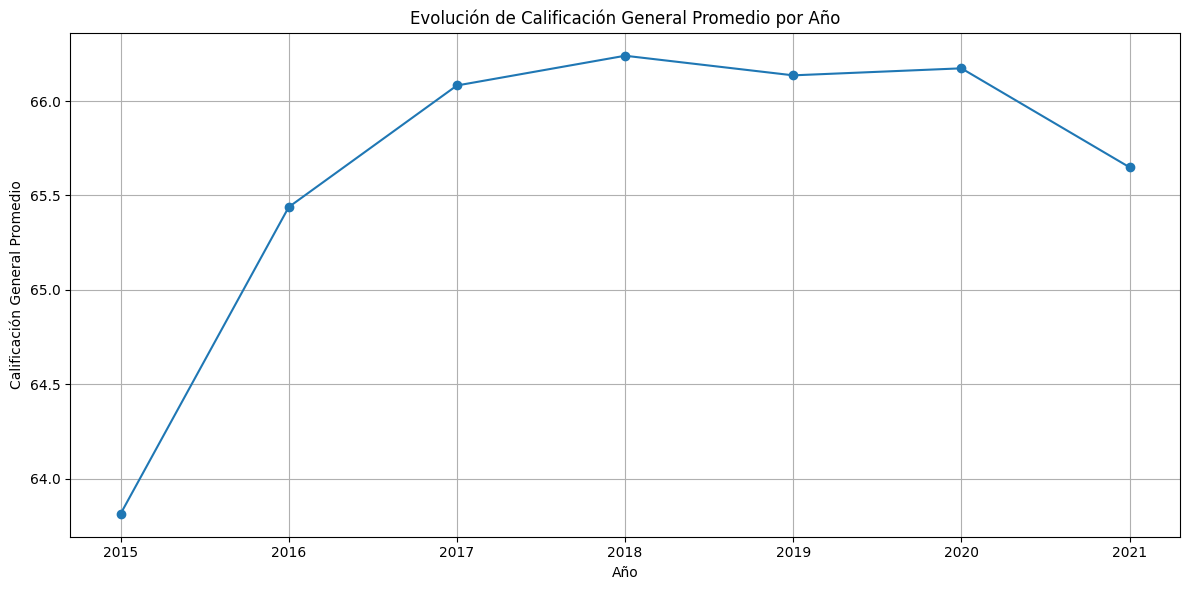

In [21]:
# crear figura con tamaño específico
plt.figure(figsize=(12, 6))

# crear gráfico de líneas
plt.plot(calificacion_por_anio.index, calificacion_por_anio.values, marker='o', linestyle='-')

# agregar título
plt.title('Evolución de Calificación General Promedio por Año')

# etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Calificación General Promedio')

# añadir cuadrícula
plt.grid(True)

# ajustar layout para que no se corten las etiquetas
plt.tight_layout()

# mostrar gráfico
plt.show()

### **Gráfico de barras - Top 10 Posiciones por Valor Promedio**

In [22]:
# calcular valor promedio por posición
valor_por_posicion = fifa.groupby("posicion_principal")["valor_euros"].mean().sort_values(ascending=False).head(10)
valor_por_posicion

posicion_principal
CF     4.762535e+06
LW     3.587170e+06
RW     3.199800e+06
CAM    2.800906e+06
LM     2.246760e+06
CM     2.236119e+06
ST     2.205426e+06
RM     2.192687e+06
CDM    2.072944e+06
CB     1.942225e+06
Name: valor_euros, dtype: float64

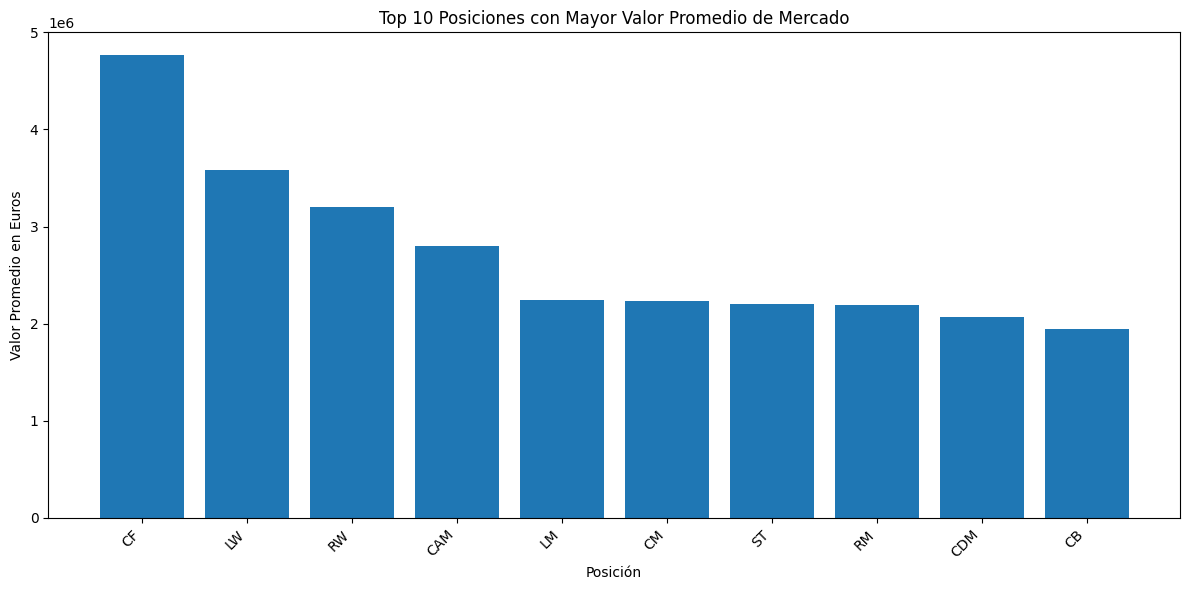

In [23]:
# crear figura
plt.figure(figsize=(12, 6))

# crear gráfico de barras
plt.bar(valor_por_posicion.index, valor_por_posicion.values)

# título y etiquetas
plt.title('Top 10 Posiciones con Mayor Valor Promedio de Mercado')
plt.xlabel('Posición')
plt.ylabel('Valor Promedio en Euros')

# rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# ajustar layout
plt.tight_layout()

# mostrar
plt.show()

## **Visualizaciones con Seaborn**

Seaborn simplifica la creación de gráficos estadísticos complejos y estéticamente agradables. Funciona excelente con DataFrames.

### **Histograma con curva de densidad - Potencial**

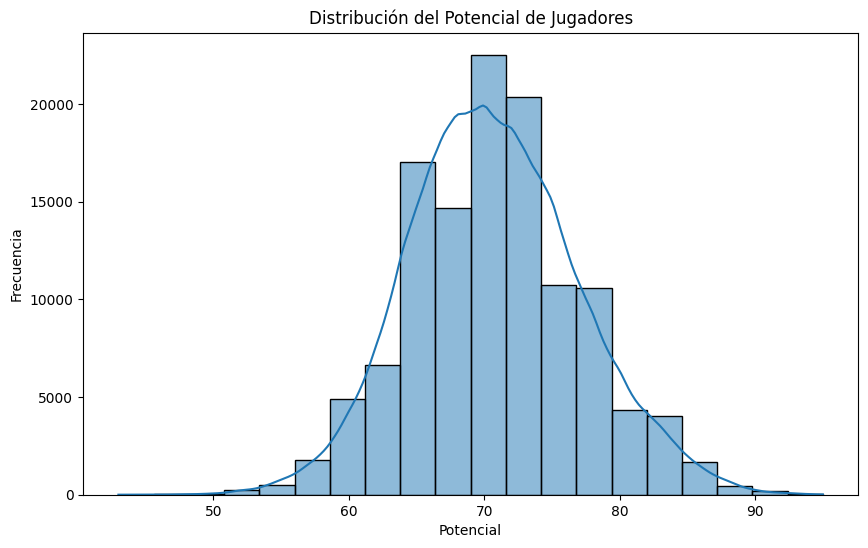

In [24]:
# crear figura
plt.figure(figsize=(10, 6))

# histograma con curva de densidad (kde)
sns.histplot(fifa['potencial'], bins=20, kde=True) # kde=True añade curva de densidad

# título y etiquetas
plt.title('Distribución del Potencial de Jugadores')
plt.xlabel('Potencial')
plt.ylabel('Frecuencia')

# mostrar
plt.show()

### **Diagrama de caja y bigote - Valor por Posición**

El boxplot muestra la distribución de los datos: mediana (línea central), cuartiles (caja) y valores atípicos (puntos fuera de los bigotes).

In [25]:
# seleccionar solo las posiciones más comunes para mejor visualización
posiciones_principales = fifa['posicion_principal'].value_counts().head(8).index
fifa_top_posiciones = fifa[fifa['posicion_principal'].isin(posiciones_principales)]

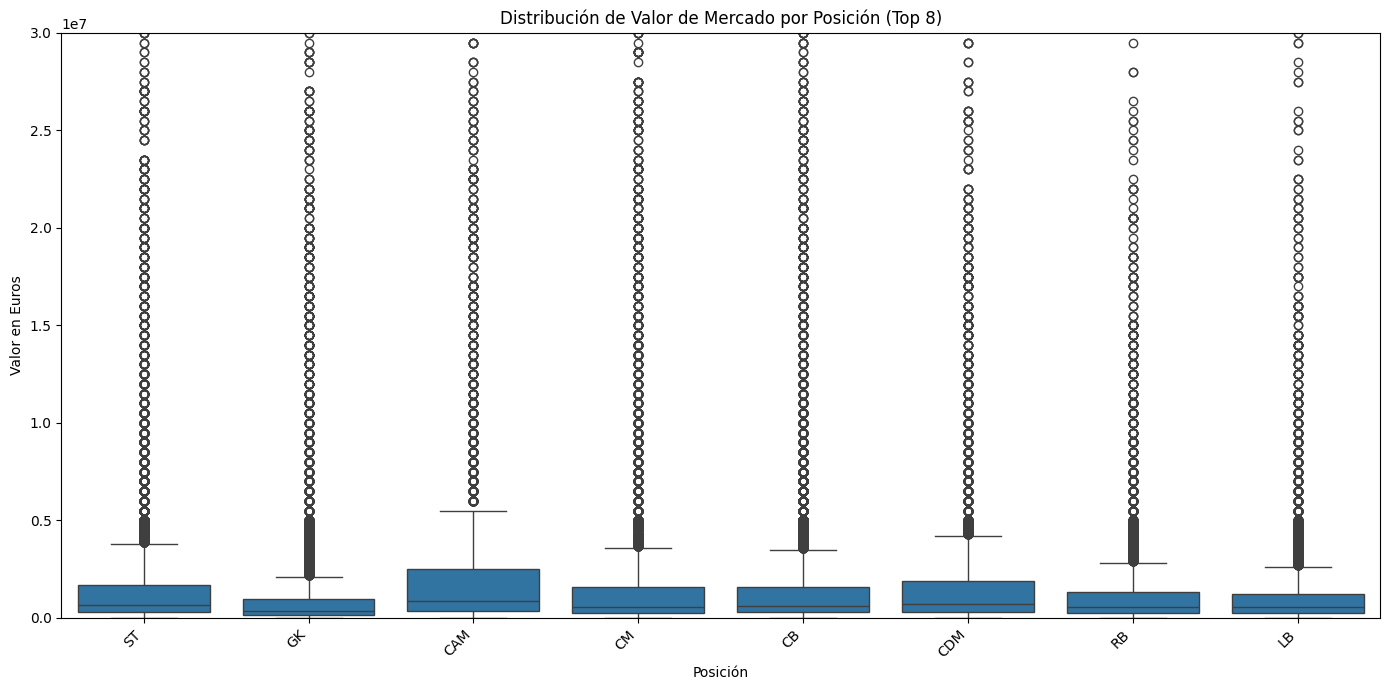

In [26]:
# crear figura
plt.figure(figsize=(14, 7))

# crear boxplot
sns.boxplot(data=fifa_top_posiciones, x='posicion_principal', y='valor_euros')

# título y etiquetas
plt.title('Distribución de Valor de Mercado por Posición (Top 8)')
plt.xlabel('Posición')
plt.ylabel('Valor en Euros')

# rotar etiquetas
plt.xticks(rotation=45, ha='right')

# limitar eje Y para ver mejor las cajas (sin outliers extremos)
plt.ylim(0, 30000000)

# ajustar layout
plt.tight_layout()

# mostrar
plt.show()

### **Violin Plot - Calificación por Categoría de Edad**

El violin plot muestra la densidad de los datos, es decir, dónde se concentran más valores.

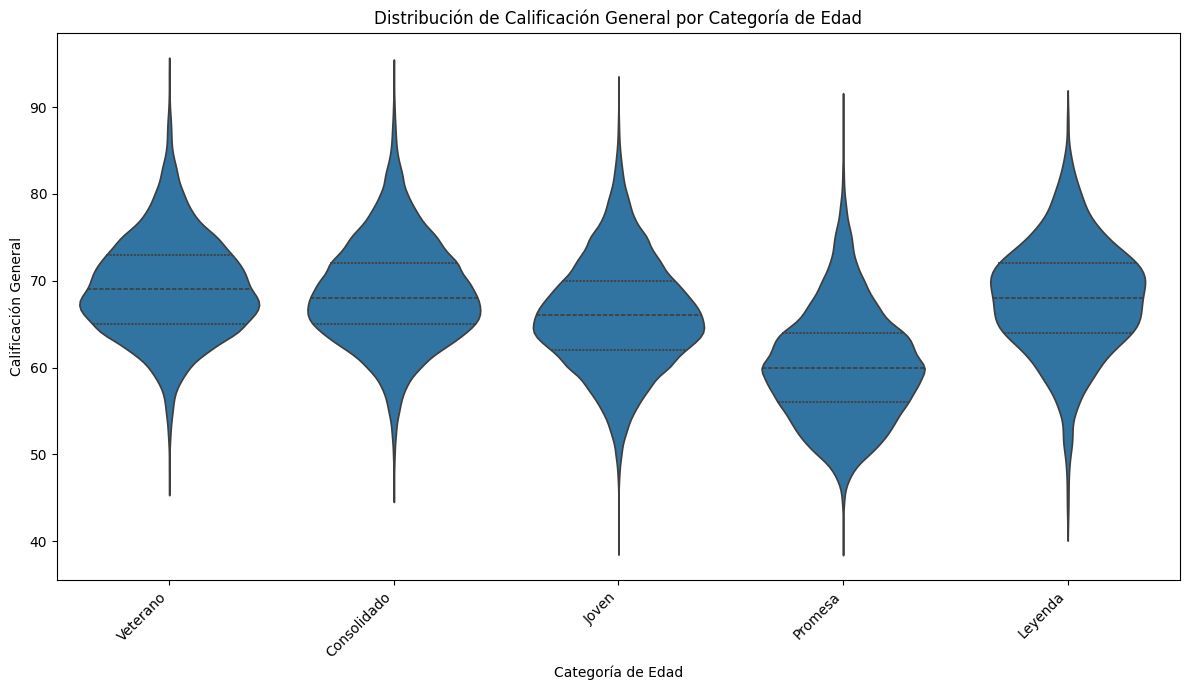

In [27]:
# crear figura
plt.figure(figsize=(12, 7))

# crear violin plot
sns.violinplot(data=fifa, x='categoria_edad', y='calificacion_general', inner='quartile')

# título y etiquetas
plt.title('Distribución de Calificación General por Categoría de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Calificación General')

# rotar etiquetas
plt.xticks(rotation=45, ha='right')

# ajustar layout
plt.tight_layout()

# mostrar
plt.show()

### **Heatmap - Matriz de Correlación**

El mapa de calor muestra qué tan relacionadas están las variables numéricas:
- Valores cercanos a 1 (rojo): correlación positiva fuerte
- Valores cercanos a -1 (azul): correlación negativa fuerte  
- Valores cercanos a 0 (blanco): no hay correlación lineal

Esto nos ayuda a identificar qué variables influyen más en el valor de mercado (nuestra variable objetivo).

In [28]:
# seleccionar columnas numéricas clave para el análisis
columnas_numericas = [
    'edad', 
    'calificacion_general', 
    'potencial', 
    'valor_euros',
    'margen_crecimiento',
    'imc',
    'promedio_atributos'
]

# calcular matriz de correlación
matriz_correlacion = fifa[columnas_numericas].corr()
matriz_correlacion

edad  calificacion_general  potencial  valor_euros  \
edad                  1.000000              0.460286  -0.185714     0.093855   
calificacion_general  0.460286              1.000000   0.707403     0.612832   
potencial            -0.185714              0.707403   1.000000     0.566598   
valor_euros           0.093855              0.612832   0.566598     1.000000   
margen_crecimiento   -0.857022             -0.510276   0.246894    -0.150790   
imc                   0.246035              0.158295  -0.019046     0.051396   
promedio_atributos    0.331142              0.749593   0.510696     0.466102   

                      margen_crecimiento       imc  promedio_atributos  
edad                           -0.857022  0.246035            0.331142  
calificacion_general           -0.510276  0.158295            0.749593  
potencial                       0.246894 -0.019046            0.510696  
valor_euros                    -0.150790  0.051396            0.466102  
margen_crecimiento              1.000000 -0.240198           -0.406308  
imc                            -0.240198  1.000000            0.117207  
promedio_atributos             -0.406308  0.117207            1.000000

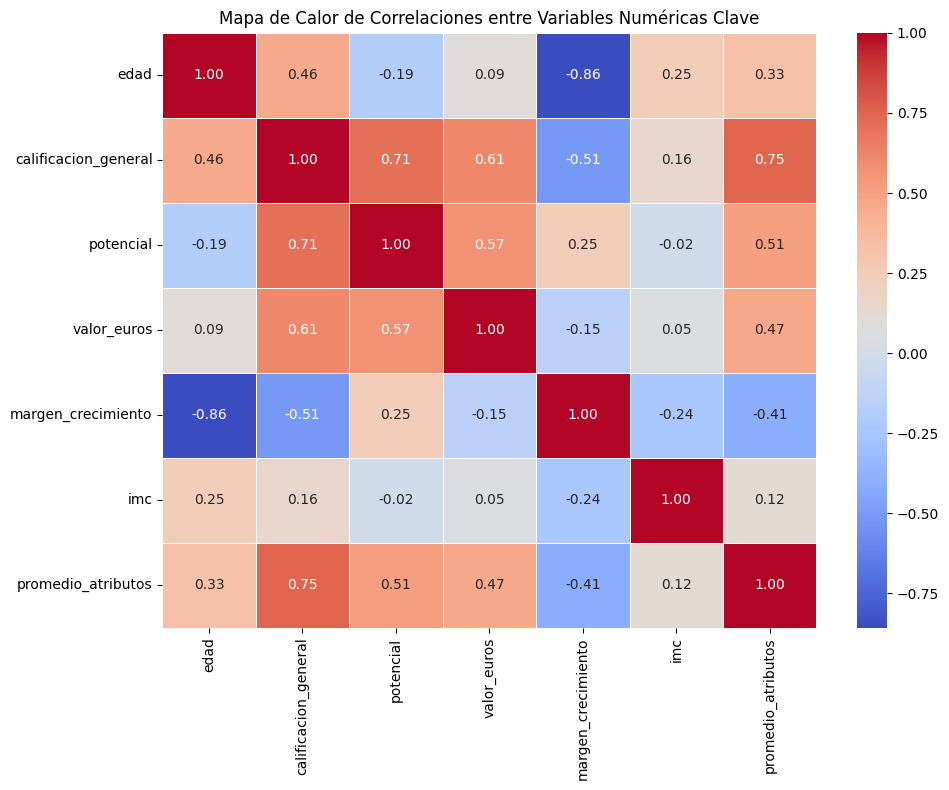

In [29]:
# crear figura más grande para el heatmap
plt.figure(figsize=(10, 8))

# crear heatmap
sns.heatmap(
    matriz_correlacion, 
    annot=True,      # mostrar valores numéricos
    cmap='coolwarm', # paleta de colores
    fmt=".2f",       # formato de números (2 decimales)
    linewidths=.5    # líneas entre celdas
)

# título
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas Clave')

# ajustar layout
plt.tight_layout()

# mostrar
plt.show()

**Interpretación del Heatmap:**
- La diagonal siempre es 1.0 (cada variable consigo misma)
- `calificacion_general` tiene alta correlación con `valor_euros` (nuestra variable objetivo)
- `potencial` también muestra correlación positiva con `valor_euros`
- `edad` puede tener correlación negativa si los jugadores jóvenes valen más
- `margen_crecimiento` (potencial - calificacion) puede indicar jugadores con alto valor futuro

## **Visualizaciones con Plotly Express**

Plotly Express crea gráficos interactivos listos para web, con zoom, tooltips, etc.

### **Gráfico de dispersión interactivo - Calificación vs Valor**

In [30]:
# filtrar datos para mejor visualización
fifa_filtrado_plotly = fifa[fifa['valor_euros'] < 50000000].copy()

# crear gráfico de dispersión interactivo
fig_scatter = px.scatter(
    fifa_filtrado_plotly,           # dataframe
    x='calificacion_general',       # eje X
    y='valor_euros',                # eje Y
    color='posicion_principal',     # colorear por posición
    size='edad',                    # tamaño del punto según edad
    hover_name='nombre_corto',      # mostrar nombre al pasar el mouse
    title='Calificación vs Valor de Mercado (< 50M euros) - Interactivo'
)

# mostrar el gráfico
fig_scatter.show()

### **Gráfico de dispersión con facetas - Por Categoría de Edad**

In [31]:
# gráfico con subgráficos por categoría de edad
fig_facet = px.scatter(
    fifa_filtrado_plotly,
    x='calificacion_general',
    y='valor_euros',
    color='posicion_principal',
    facet_col='categoria_edad',    # crear un gráfico por cada categoría de edad
    facet_col_wrap=3,              # máximo 3 columnas
    title='Calificación vs Valor por Categoría de Edad'
)

# mostrar
fig_facet.show()

### **Sunburst - Distribución por Posición y Categoría de Valor**

El gráfico sunburst muestra jerarquías. El centro representa la categoría principal y los anillos externos las subcategorías.

In [32]:
# agrupar datos para el sunburst
fifa_agrupado = fifa.groupby(['posicion_principal', 'categoria_valor'])['nombre_corto'].count().reset_index()
fifa_agrupado.columns = ['posicion_principal', 'categoria_valor', 'cantidad_jugadores']

In [33]:
# crear sunburst
fig_sunburst = px.sunburst(
    fifa_agrupado,
    path=['posicion_principal', 'categoria_valor'], # jerarquía
    values='cantidad_jugadores',                    # tamaño de las secciones
    title='Distribución de Jugadores por Posición y Categoría de Valor'
)

# mostrar
fig_sunburst.show()

## **Análisis de Jugadores Infravalorados**

Identificar jugadores con alto potencial pero bajo valor actual (posibles infravalorados).

In [34]:
# filtrar jugadores con alto margen de crecimiento y valor relativamente bajo
fifa_infravalorados = fifa[
    (fifa['margen_crecimiento'] >= 10) &  # al menos 10 puntos de margen
    (fifa['valor_euros'] < 5000000)        # valor menor a 5 millones
].sort_values('margen_crecimiento', ascending=False)

# top 20 jugadores potencialmente infravalorados
fifa_infravalorados[['nombre_corto', 'edad', 'calificacion_general', 'potencial', 'margen_crecimiento', 'valor_euros', 'posicion_principal']].head(20)

nombre_corto  edad  calificacion_general  potencial  \
119120         C. Burton    17                    50         78   
104478        M. Edwards    17                    58         84   
119955      H. Andersson    16                    49         75   
120144           D. Amos    17                    48         74   
79664           A. Gomes    16                    63         89   
113483       R. Richards    16                    54         80   
119215       D. Campbell    17                    50         76   
116596          A. Aktas    16                    52         78   
93442       B. Arrey-Mbi    17                    60         86   
120500  J. Latibeaudiere    17                    47         73   
114135        C. Gregory    17                    54         80   
119154       K. Sadłocha    17                    50         76   
116015        S. Auklend    17                    53         78   
112364            O. Aga    17                    55         80   
119775         A. Famewo    17                    49         74   
118523      T. Gulliksen    16                    51         76   
110513    S. Ramos Mingo    17                    56         81   
103909        O. Babuscu    16                    58         83   
118160  M. Bech Sørensen    17                    51         76   
120267       T. Bakinson    17                    48         73   

        margen_crecimiento  valor_euros posicion_principal  
119120                  28        20000                 GK  
104478                  26       275000                CAM  
119955                  26        60000                 CB  
120144                  26        60000                 LB  
79664                   26       800000                CAM  
113483                  26       150000                 LM  
119215                  26        60000                 CM  
116596                  26       110000                CAM  
93442                   26       425000                 CB  
120500                  26        60000                 CB  
114135                  26       120000                 GK  
119154                  26        70000                 ST  
116015                  25       130000                CAM  
112364                  25       180000                 ST  
119775                  25        60000                 CB  
118523                  25        80000                 CM  
110513                  25       180000                 CB  
103909                  25       275000                CAM  
118160                  25        80000                 LB  
120267                  25        70000                 CM

## **Resumen de Hallazgos Clave**

**Conclusiones del Análisis Exploratorio:**

1. **Distribución de Variables:**
   - La mayoría de jugadores tienen calificaciones entre 60-75
   - La edad promedio ronda los 25 años
   - El valor de mercado tiene distribución muy sesgada (pocos jugadores muy valiosos)

2. **Correlaciones Importantes:**
   - `calificacion_general` tiene fuerte correlación con `valor_euros`
   - `potencial` también influye significativamente en el valor
   - La relación edad-valor no es lineal (jugadores muy jóvenes o muy viejos valen menos)

3. **Patrones por Posición:**
   - Atacantes y mediocampistas ofensivos tienden a tener valores más altos
   - Porteros y defensas tienen valores más estables

4. **Jugadores Infravalorados:**
   - Existen jugadores jóvenes con alto margen de crecimiento y bajo valor actual
   - Estos son candidatos ideales para el modelo de predicción

**Próximos Pasos:**
- Preparar datos para Machine Learning
- Entrenar modelo de regresión para predecir `valor_euros`
- Identificar jugadores infravalorados usando las predicciones del modelo